## pandas: powerful Python data analysis toolkit

pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this goal.

[documentation](http://pandas.pydata.org/pandas-docs/stable/)

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# R style
plt.style.use('ggplot')

In [5]:
x = Series(range(5,10))
x

0    5
1    6
2    7
3    8
4    9
dtype: int64

In [6]:
x.sum(), x.mean(), x.std()

(35, 7.0, 1.5811388300841898)

In [7]:
x**2

0    25
1    36
2    49
3    64
4    81
dtype: int64

In [8]:
x[x >= 8]

3    8
4    9
dtype: int64

In [9]:
x[1:4]

1    6
2    7
3    8
dtype: int64

In [10]:
x.index = list('abcde')
x

a    5
b    6
c    7
d    8
e    9
dtype: int64

In [11]:
x['a':'c']

a    5
b    6
c    7
dtype: int64

In [12]:
x.a, x.c, x.e

(5, 7, 9)

In [13]:
y = Series([10, np.nan, np.nan, 13, 14])
y

0    10.0
1     NaN
2     NaN
3    13.0
4    14.0
dtype: float64

In [14]:
z = pd.concat([x, y])
z

a     5.0
b     6.0
c     7.0
d     8.0
e     9.0
0    10.0
1     NaN
2     NaN
3    13.0
4    14.0
dtype: float64

In [15]:
z = z.reset_index(drop=True)
z

0     5.0
1     6.0
2     7.0
3     8.0
4     9.0
5    10.0
6     NaN
7     NaN
8    13.0
9    14.0
dtype: float64

In [16]:
z.sum(), z.mean(), z.std()

(72.0, 9.0, 3.2071349029490928)

In [17]:
z[z.isnull()]

6   NaN
7   NaN
dtype: float64

In [18]:
z[z.notnull()]

0     5.0
1     6.0
2     7.0
3     8.0
4     9.0
5    10.0
8    13.0
9    14.0
dtype: float64

In [19]:
z.fillna(0)

0     5.0
1     6.0
2     7.0
3     8.0
4     9.0
5    10.0
6     0.0
7     0.0
8    13.0
9    14.0
dtype: float64

In [20]:
z.fillna(method='ffill')

0     5.0
1     6.0
2     7.0
3     8.0
4     9.0
5    10.0
6    10.0
7    10.0
8    13.0
9    14.0
dtype: float64

In [21]:
z.fillna(z.mean())

0     5.0
1     6.0
2     7.0
3     8.0
4     9.0
5    10.0
6     9.0
7     9.0
8    13.0
9    14.0
dtype: float64

In [23]:
z.index = pd.date_range('01-Jan-2016', periods=len(z))
z

2016-01-01     5.0
2016-01-02     6.0
2016-01-03     7.0
2016-01-04     8.0
2016-01-05     9.0
2016-01-06    10.0
2016-01-07     NaN
2016-01-08     NaN
2016-01-09    13.0
2016-01-10    14.0
Freq: D, dtype: float64

In [24]:
z.resample('W').sum()

2016-01-03    18.0
2016-01-10    54.0
Freq: W-SUN, dtype: float64

In [25]:
z.index.strftime('%b %d, %Y')

array(['Jan 01, 2016', 'Jan 02, 2016', 'Jan 03, 2016', 'Jan 04, 2016',
       'Jan 05, 2016', 'Jan 06, 2016', 'Jan 07, 2016', 'Jan 08, 2016',
       'Jan 09, 2016', 'Jan 10, 2016'],
      dtype='<U12')

### Titanic Data Analysis

In [26]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv'
titanic = pd.read_csv(url)

In [27]:
titanic.shape

(891, 15)

In [28]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [29]:
# drop some columns
titanic = titanic[['survived', 'sex', 'age', 'fare',
                   'embarked', 'class', 'who', 'deck', 'embark_town',]]

In [30]:
titanic.dtypes

survived         int64
sex             object
age            float64
fare           float64
embarked        object
class           object
who             object
deck            object
embark_town     object
dtype: object

In [33]:
titanic.loc[0]

survived                 0
sex                   male
age                     22
fare                  7.25
embarked                 S
class                Third
who                    man
deck                   NaN
embark_town    Southampton
Name: 0, dtype: object

In [34]:
titanic.describe()

,survived,age,fare
count,891.000000,714.000000,891.000000
mean,0.383838,29.699118,32.204208
std,0.486592,14.526497,49.693429
min,0.000000,0.420000,0.000000
25%,0.000000,20.125000,7.910400
50%,0.000000,28.000000,14.454200
75%,1.000000,38.000000,31.000000
max,1.000000,80.000000,512.329200


In [35]:
titanic.head()

,survived,sex,age,fare,embarked,class,who,deck,embark_town
0,0,male,22.0,7.2500,S,Third,man,NaN,Southampton
1,1,female,38.0,71.2833,C,First,woman,C,Cherbourg
2,1,female,26.0,7.9250,S,Third,woman,NaN,Southampton
3,1,female,35.0,53.1000,S,First,woman,C,Southampton
4,0,male,35.0,8.0500,S,Third,man,NaN,Southampton


In [36]:
titanic.tail()

,survived,sex,age,fare,embarked,class,who,deck,embark_town
886,0,male,27.0,13.00,S,Second,man,NaN,Southampton
887,1,female,19.0,30.00,S,First,woman,B,Southampton
888,0,female,NaN,23.45,S,Third,woman,NaN,Southampton
889,1,male,26.0,30.00,C,First,man,C,Cherbourg
890,0,male,32.0,7.75,Q,Third,man,NaN,Queenstown


In [37]:
titanic[10:15]

,survived,sex,age,fare,embarked,class,who,deck,embark_town
10,1,female,4.0,16.7000,S,Third,child,G,Southampton
11,1,female,58.0,26.5500,S,First,woman,C,Southampton
12,0,male,20.0,8.0500,S,Third,man,NaN,Southampton
13,0,male,39.0,31.2750,S,Third,man,NaN,Southampton
14,0,female,14.0,7.8542,S,Third,child,NaN,Southampton


In [38]:
titanic.loc[10:15, 'age':'fare']

,age,fare
10,4.0,16.7000
11,58.0,26.5500
12,20.0,8.0500
13,39.0,31.2750
14,14.0,7.8542
15,55.0,16.0000


In [39]:
titanic[titanic.age < 2]

,survived,sex,age,fare,embarked,class,who,deck,embark_town
78,1,male,0.83,29.0000,S,Second,child,NaN,Southampton
164,0,male,1.00,39.6875,S,Third,child,NaN,Southampton
172,1,female,1.00,11.1333,S,Third,child,NaN,Southampton
183,1,male,1.00,39.0000,S,Second,child,F,Southampton
305,1,male,0.92,151.5500,S,First,child,C,Southampton
381,1,female,1.00,15.7417,C,Third,child,NaN,Cherbourg
386,0,male,1.00,46.9000,S,Third,child,NaN,Southampton
469,1,female,0.75,19.2583,C,Third,child,NaN,Cherbourg
644,1,female,0.75,19.2583,C,Third,child,NaN,Cherbourg
755,1,male,0.67,14.5000,S,Second,child,NaN,Southampton


In [40]:
titanic.sort_values('age', ascending=True).head()

,survived,sex,age,fare,embarked,class,who,deck,embark_town
803,1,male,0.42,8.5167,C,Third,child,NaN,Cherbourg
755,1,male,0.67,14.5000,S,Second,child,NaN,Southampton
644,1,female,0.75,19.2583,C,Third,child,NaN,Cherbourg
469,1,female,0.75,19.2583,C,Third,child,NaN,Cherbourg
78,1,male,0.83,29.0000,S,Second,child,NaN,Southampton


In [41]:
titanic.sort_values(['survived', 'age'], ascending=[True, True]).head()

,survived,sex,age,fare,embarked,class,who,deck,embark_town
164,0,male,1.0,39.6875,S,Third,child,NaN,Southampton
386,0,male,1.0,46.9000,S,Third,child,NaN,Southampton
7,0,male,2.0,21.0750,S,Third,child,NaN,Southampton
16,0,male,2.0,29.1250,Q,Third,child,NaN,Queenstown
119,0,female,2.0,31.2750,S,Third,child,NaN,Southampton


In [42]:
sex_class = titanic.groupby(['sex', 'class'])
sex_class.count()

survived  age  fare  embarked  who  deck  embark_town
sex    class                                                        
female First         94   85    94        92   94    81           92
       Second        76   74    76        76   76    10           76
       Third        144  102   144       144  144     6          144
male   First        122  101   122       122  122    94          122
       Second       108   99   108       108  108     6          108
       Third        347  253   347       347  347     6          347

### Q:  Why Rose survived but Jake didn’t ?

In [44]:
df = sex_class.mean()
df['survived']

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [45]:
# Of the females who were in first class, count the number from each embarking town
sex_class.get_group(('female', 'First')).groupby('embark_town').count()

,survived,sex,age,fare,embarked,class,who,deck
embark_town,,,,,,,,
Cherbourg,43,43,38,43,43,43,43,35
Queenstown,1,1,1,1,1,1,1,1
Southampton,48,48,44,48,48,48,48,43


In [46]:
pd.crosstab(titanic.survived, titanic['class'])

class,First,Second,Third
survived,,,
0,80,97,372
1,136,87,119


In [47]:
def my_func(x):
    return np.max(x)

In [48]:
mapped_funcs = {'embarked': 'count', 'age': ('mean', 'median', my_func), 'survived': sum}
sex_class.get_group(('female', 'First')).groupby('embark_town').agg(mapped_funcs)

age                survived embarked
                  mean median my_func      sum    count
embark_town                                            
Cherbourg    36.052632   37.0    60.0       42       43
Queenstown   33.000000   33.0    33.0        1        1
Southampton  32.704545   33.0    63.0       46       48

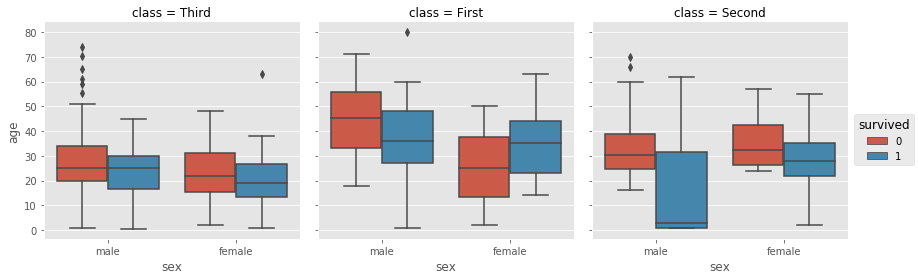

In [49]:
import seaborn as sns
sns.set_context(font_scale=4)
sns.factorplot(x='sex', y='age', hue='survived', col='class', kind='box', data=titanic)
pass

### Make plots with pandas

In [51]:
from pandas_datareader import data as web
import datetime

In [52]:
apple = web.DataReader('AAPL', 'google',
                        start = datetime.datetime(2015, 1, 1),
                        end = datetime.datetime(2015, 12, 31))
apple.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-09-16,115.12,116.13,114.04,114.92,79886911
2016-09-19,115.19,116.18,113.25,113.58,47023046
2016-09-20,113.05,114.12,112.51,113.57,34514269
2016-09-21,113.85,113.99,112.44,113.55,36003185
2016-09-22,114.35,114.94,114.00,114.62,31073984


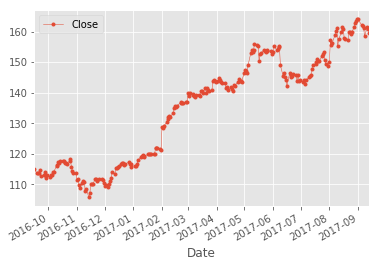

In [54]:
apple.plot.line(y='Close', marker='o', markersize=3, linewidth=0.5)
pass

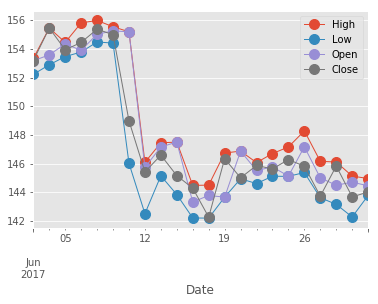

In [57]:
# Zoom in on large drop in June
aug = apple['2017-06-01':'2017-06-30']
aug.plot.line(y=['High', 'Low', 'Open', 'Close'], marker='o', markersize=10, linewidth=1)
pass

### Data Conversion

In [58]:
titanic.head(2)

,survived,sex,age,fare,embarked,class,who,deck,embark_town
0,0,male,22.0,7.2500,S,Third,man,NaN,Southampton
1,1,female,38.0,71.2833,C,First,woman,C,Cherbourg


In [59]:
titanic.to_csv('titanic.csv', index=False)

In [60]:
t1 = pd.read_csv('titanic.csv')
t1.head(2)

,survived,sex,age,fare,embarked,class,who,deck,embark_town
0,0,male,22.0,7.2500,S,Third,man,NaN,Southampton
1,1,female,38.0,71.2833,C,First,woman,C,Cherbourg


In [ ]:
!pip install openpyxl
t1.to_excel('titanic.xlsx')

In [63]:
t2 = pd.read_excel('titanic.xlsx')
t2.head(2)

,survived,sex,age,fare,embarked,class,who,deck,embark_town
0,0,male,22.0,7.2500,S,Third,man,NaN,Southampton
1,1,female,38.0,71.2833,C,First,woman,C,Cherbourg


In [64]:
import sqlite3

con = sqlite3.connect('titanic.db')
t2.to_sql('titanic', con, index=False, if_exists='replace')

In [65]:
t3 = pd.read_sql('select * from titanic', con)
t3.head(2)

,survived,sex,age,fare,embarked,class,who,deck,embark_town
0,0,male,22.0,7.2500,S,Third,man,None,Southampton
1,1,female,38.0,71.2833,C,First,woman,C,Cherbourg


In [67]:
t3.to_json('titanic.json')
t4 = pd.read_json('titanic.json')
t4.head(2)

,age,class,deck,embark_town,embarked,fare,sex,survived,who
0,22.0,Third,None,Southampton,S,7.2500,male,0,man
1,38.0,First,C,Cherbourg,C,71.2833,female,1,woman


In [68]:
t4 = t4[t3.columns]
t4.head(2)

,survived,sex,age,fare,embarked,class,who,deck,embark_town
0,0,male,22.0,7.2500,S,Third,man,None,Southampton
1,1,female,38.0,71.2833,C,First,woman,C,Cherbourg
